## Data Exploration - Univariate


<center>"Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations." - towarddatascience.com</center>

## Data Understanding

In order to thoroughly understand this merged dataset I ran some simple code to see things like columns names, data type, the length of the data set and distinct countries. 

I also highlited how this dataset can help me reach my overall project goals. 

In [2]:
# Importing Merged Data
import pandas as pd
merged = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/merged.csv")

#Displaying Column Names
column_names = merged.columns
column_names 

Index(['Aqua Production (Millions)', 'Marine Protected Area (sqkm)',
       'Inventions (number)', 'Instruments (number)',
       'Fishing Exports (Millions)', 'Country', 'Year'],
      dtype='object')

Column Names in Data Set:

- Country
- Year
- Aqua Production
- Marine Protected Area
- Inventions
- Instruments
- Fishing Exports

In [83]:
#Data Types of Dataset
column_types = merged.dtypes
print(column_types)

Aqua Production (Millions)      float64
Marine Protected Area (sqkm)    float64
Inventions (number)             float64
Instruments (number)            float64
Fishing Exports (Millions)      float64
Country                          object
Year                              int64
dtype: object


In [84]:
#Length of Data Set
length = len(merged)

#Distict Countries
distinct_country_count = merged['Country'].nunique()

length
distinct_country_count

43

This dataset has **860 Rows** and there are **43** distinct countries analyzed 

Although this dataset is small, it holds a lot of power in understanding what is being done to help ocean sustainability. It includes data from 2000 through 2021 from 43 different countries. Using this dataset we can analyze aquaculture production and how much money it has brought in, marine protected areas in each country, the number of environmental technology inventions that have been created, the number of policy instruments created and the amount of money countries make in fishing exports. 

All these values can answer questions regarding the importance of ocean sustainability and what is currently being done and more specifically questions like:

Does the amount of marine protected area in a country impact aquaculture production or is there a correlation between inventions and fishing exports. 

## Descriptive Statistics 

This section will report on basic summary staistics such as mean, median, mode, standard deviation, and variance for numerical variables. For categorical variables, I will provide frequency distributions and bar charts to visualize data distribution.

This dataset includes mainly numerical data with the only categorical variable being country. 

In [85]:
#Aquaculture Summary Statistics
a_p_summary = merged[["Aqua Production (Millions)"]].describe()
a_p_summary


,Aqua Production (Millions)
count,8.600000e+02
mean,1.055889e+05
std,3.111661e+05
min,0.000000e+00
25%,3.380500e+03
50%,9.363000e+03
75%,5.673412e+04
max,3.036163e+06


In [30]:
#Marine Protected Area Statistics
mpa_summary = merged[["Marine Protected Area (sqkm)"]].describe()
mpa_summary

,Marine Protected Area (sqkm)
count,860.000000
mean,1853.152953
std,6664.251758
min,0.000000
25%,50.835000
50%,347.040000
75%,907.120000
max,63430.040000


In [32]:
#Inventions Statistics
inventions_summary = merged[["Inventions (number)"]].describe()
inventions_summary

,Inventions (number)
count,860.000000
mean,45.276081
std,132.472040
min,0.000000
25%,1.000000
50%,7.500000
75%,32.812500
max,1404.330000


In [3]:
#Instruments Statistics
Instruments_summary = merged[["Instruments (number)"]].describe()
Instruments_summary

,Instruments (number)
count,860.000000
mean,4.244186
std,3.896316
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,15.000000


In [44]:
#Fishing Statistics
fishing_summary = merged[["Fishing Exports (Millions)"]].describe()
fishing_summary

,Fishing Exports (Millions)
count,860.000000
mean,2349.839791
std,3025.914113
min,8.920000
25%,511.342500
50%,1435.650000
75%,2983.497500
max,21383.010000


## Data Visualization 

**Sum of ENVTECH Inventions Each Year**

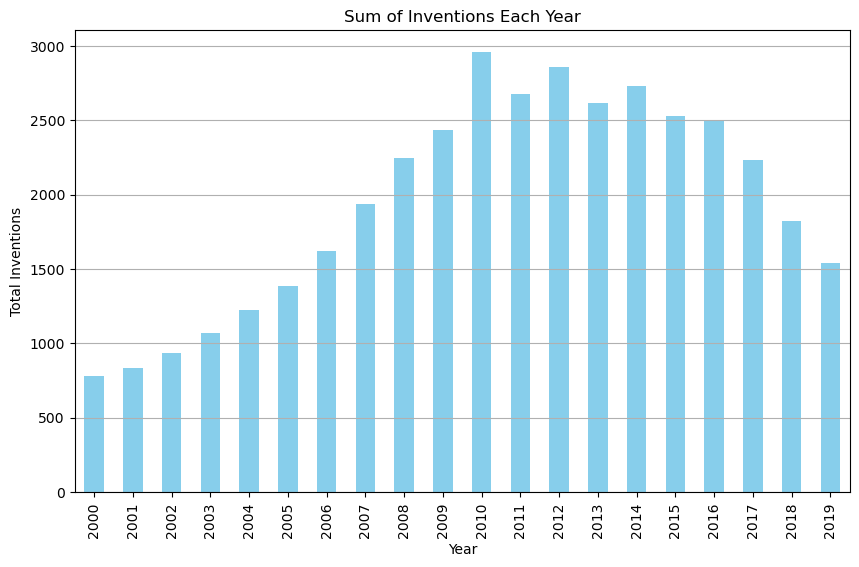

In [129]:
#| code-fold: true
import matplotlib.pyplot as plt
import pandas as pd

#Sum of Inventions Each Year
yearly_inventions = merged.groupby('Year')['Inventions (number)'].sum()
plt.figure(figsize=(10, 6))
yearly_inventions.plot(kind='bar', color='skyblue')
plt.title('Sum of Inventions Each Year')
plt.xlabel('Year')
plt.ylabel('Total Inventions')
plt.grid(axis='y')


**Sum of Policy Instruments throughout the Years**

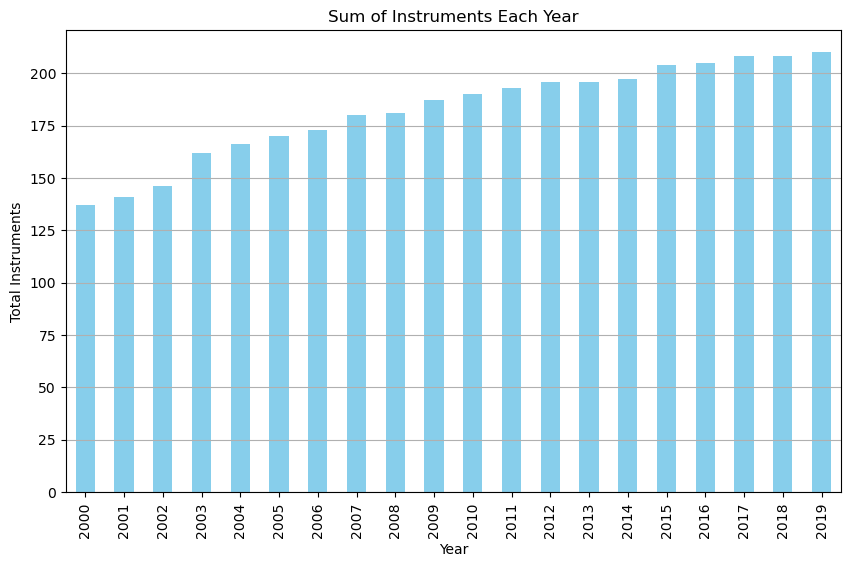

In [130]:
#| code-fold: true
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Sum of Instruments Each Year
yearly_Instruments = merged.groupby('Year')['Instruments (number)'].sum()
plt.figure(figsize=(10, 6))
yearly_Instruments.plot(kind='bar', color='skyblue')
plt.title('Sum of Instruments Each Year')
plt.xlabel('Year')
plt.ylabel('Total Instruments')
plt.grid(axis='y')


**Sum of MPA throughout the Years**

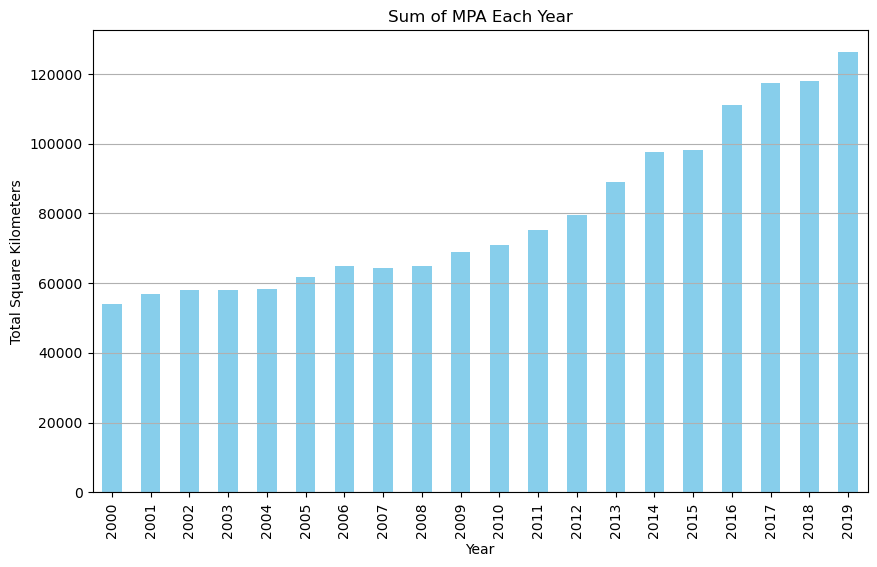

In [131]:
#| code-fold: true
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Sum of MPA Each Year
yearly_Instruments = merged.groupby('Year')['Marine Protected Area (sqkm)'].sum()
plt.figure(figsize=(10, 6))
yearly_Instruments.plot(kind='bar', color='skyblue')
plt.title('Sum of MPA Each Year')
plt.xlabel('Year')
plt.ylabel('Total Square Kilometers')
plt.grid(axis='y')


**Countries with the highest total area of MPA**

In [126]:
#| code-fold: true
#Find top countries with highest MPA
top_countries = merged.groupby('Country')['Marine Protected Area (sqkm)'].sum().sort_values(ascending=False)
top_10_countries = top_countries.head(10)
table_data = pd.DataFrame({'Country': top_10_countries.index, 'Marine Protected Area (sqkm)': top_10_countries.values})
print(table_data)

                          Country  Marine Protected Area (sqkm)
0    China (People's Republic of)                     843249.84
1                           Chile                     115489.24
2                          Norway                      83016.63
3                           Japan                      80382.20
4                       Indonesia                      76453.48
5                        Viet Nam                      70032.87
6                        Thailand                      43488.91
7                           India                      36633.87
8                           Korea                      36603.22
9                     Philippines                      29269.94


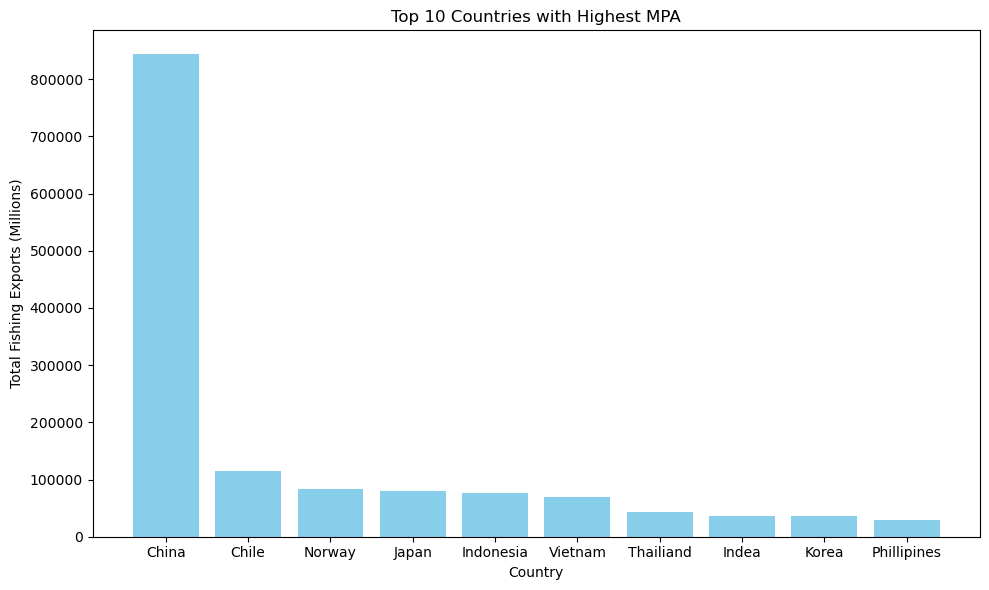

In [128]:
#| code-fold: true
import matplotlib.pyplot as plt
import pandas as pd
custom_labels = ['China', 'Chile', 'Norway', 'Japan', 'Indonesia', 'Vietnam', 'Thailiand', 'Indea', 'Korea', 'Phillipines']
plt.figure(figsize=(10, 6))
plt.title('Top 10 Countries with Highest MPA')
plt.xlabel('Country')
plt.ylabel('Total Fishing Exports (Millions)')
plt.bar(custom_labels, table_data['Marine Protected Area (sqkm)'], color='skyblue')
plt.tight_layout()


**Sum of Aquaculture Production throughout the Years**

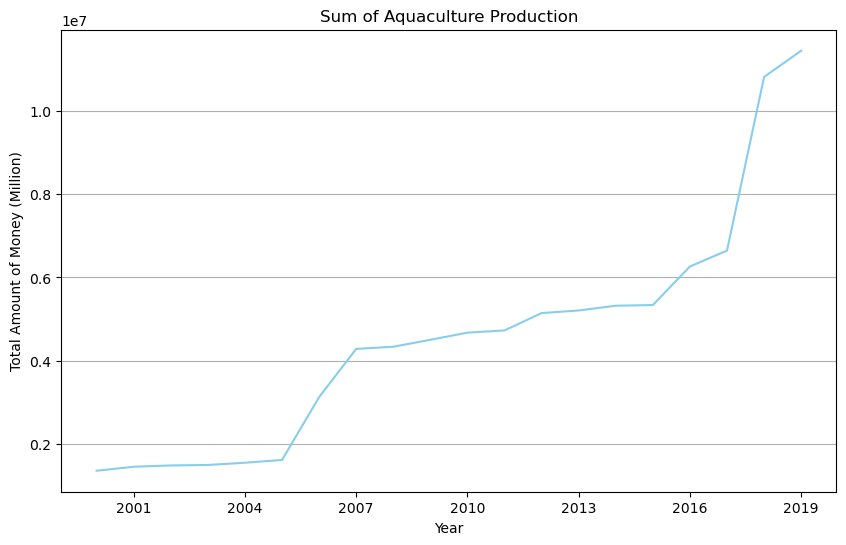

In [95]:
#| code-fold: true
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.ticker as ticker

# Sum of Aqua Productions Each Year
yearly_Instruments = merged.groupby('Year')['Aqua Production (Millions)'].sum()
plt.figure(figsize=(10, 6))
yearly_Instruments.plot(kind='line', color='skyblue')
plt.title('Sum of Aquaculture Production')
plt.xlabel('Year')
plt.ylabel('Total Amount of Money (Million)')
plt.grid(axis='y')

# Set x-axis tick labels to integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the plot
plt.show()


**Countries with highest Aquaculture Production**

In [101]:
#| code-fold: true
top_countries = merged.groupby('Country')['Aqua Production (Millions)'].sum().sort_values(ascending=False)
top_10_countries = top_countries.head(10)
table_data = pd.DataFrame({'Country': top_10_countries.index, 'Aqua Production (Millions)': top_10_countries.values})
print(table_data)

         Country  Aqua Production (Millions)
0  United States                 23311325.00
1    New Zealand                 16571948.95
2      Australia                 16034834.30
3          Japan                  5798389.20
4          Chile                  4858410.35
5         Mexico                  3492952.65
6         Brazil                  2899993.85
7      Indonesia                  2227158.50
8         France                  2006056.35
9         Russia                  1780853.55


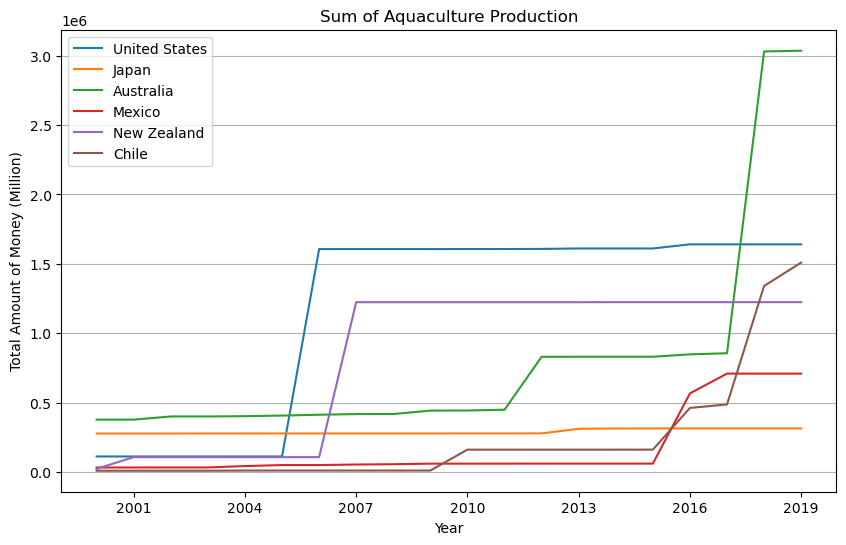

In [104]:
#| code-fold: true

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Specific Countires to Plot
countries_to_plot = ['United States', 'Japan', 'Australia', 'Mexico', 'New Zealand', 'Chile']

plt.figure(figsize=(10, 6))
plt.title('Sum of Aquaculture Production')
plt.xlabel('Year')
plt.ylabel('Total Amount of Money (Million)')
plt.grid(axis='y')

# Plot lines for the specified countries
for country in countries_to_plot:
    country_data = merged[merged['Country'] == country]
    yearly_production = country_data.groupby('Year')['Aqua Production (Millions)'].sum()
    plt.plot(yearly_production.index, yearly_production.values, label=country)

plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

**Countries with highest Fishing Exports**

In [103]:
#| code-fold: true
top_countries = merged.groupby('Country')['Fishing Exports (Millions)'].sum().sort_values(ascending=False)
top_10_countries = top_countries.head(10)
table_data = pd.DataFrame({'Country': top_10_countries.index, 'Fishing Exports (Millions)': top_10_countries.values})
print(table_data)

                          Country  Fishing Exports (Millions)
0    China (People's Republic of)                   327595.17
1                          Norway                   147995.31
2                        Viet Nam                   136660.23
3                        Thailand                   134184.37
4                   United States                   103411.96
5                           Chile                    88632.65
6                          Canada                    83998.86
7                         Denmark                    82218.99
8                           India                    69493.75
9                       Indonesia                    65525.58


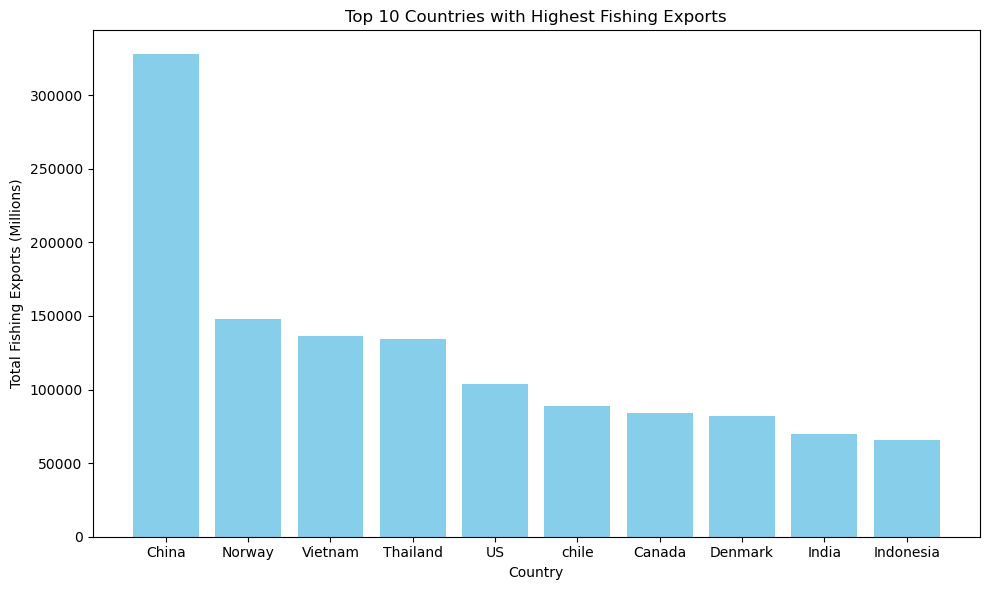

In [119]:
#| code-fold: true
import matplotlib.pyplot as plt
import pandas as pd
custom_labels = ['China', 'Norway', 'Vietnam', 'Thailand', 'US', 'chile', 'Canada', 'Denmark', 'India', 'Indonesia']
plt.figure(figsize=(10, 6))
plt.title('Top 10 Countries with Highest Fishing Exports')
plt.xlabel('Country')
plt.ylabel('Total Fishing Exports (Millions)')
plt.bar(custom_labels, table_data['Fishing Exports (Millions)'], color='skyblue')
plt.tight_layout()


**Predicted Plastic Leakage**

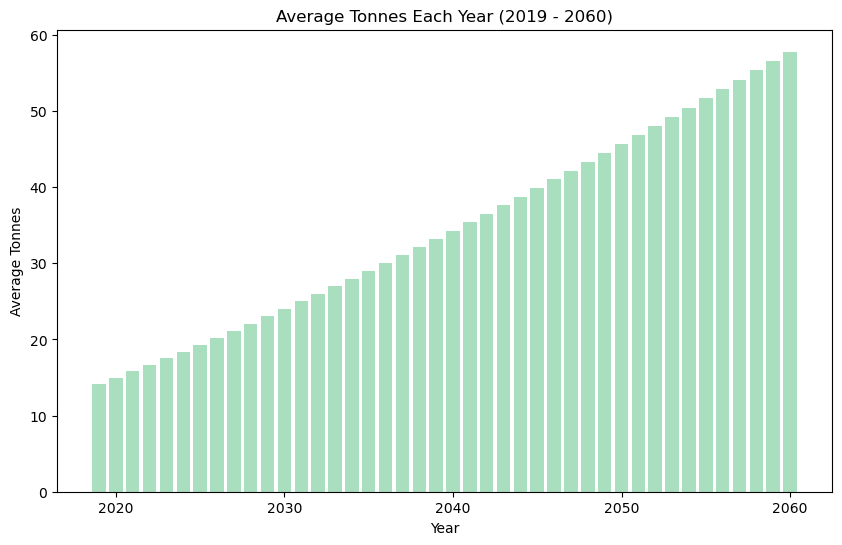

In [122]:
#| code-fold: true
data1a = pd.read_csv(
    '/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/cleandata1a.csv')

#average Tones by Year
average_tonnes = data1a.groupby("Time")["Value"].mean()

# Bar Chart - Average Tonnes Each Year
plt.figure(figsize=(10, 6))
plt.bar(average_tonnes.index, average_tonnes.values, color='#A9DFBF')
plt.xlabel("Year")
plt.ylabel("Average Tonnes")
plt.title("Average Tonnes Each Year (2019 - 2060)")
plt.show()

## Correlation Analysis 

To see an indepeth correlation analysis between variable follow this link [here](multivariate.ipynb)

## Outliers

Throughout this univariate EDA phase I have noticed a few outliers. First, I noticed that China's fishing exports are very large in comparison to the following nine countries. Additionally, Australia's numbers are high when it comes to aquaculture production.

I do not think outliers like these will be a problem within this project as these high number *make sense* for the location of these countries.

## Hypthesis Generation

I am keeping the hypothesis I have created in the introduction. I believe this data holds the power to clearly and concisely display the need for ocean sustainability in addition to what is being done and how it has helped so far. This data has the ability to help researchers, policy makers, etc understand what countries are doing well in regard to ocean sustainability. I will touch upon (also have touched upon) reaching my goals for this project when explaining visualization and models in this project. 

## Methods and Findings 


This univariate EDA helped me grasp a good understanding of my data and a few key trends that I will look further into it different phases of this project. A few key takeaways from this univariate eda are:

- The number of environmental technology inventions increased around 2010 and since then has decreased 
- The number of policy instuments are slowly increasing each year
- Aquaculture Production is increasing 
- Aquaculture prodiction is highest in the United States, New Zealand and Australia
- MPA is increasing 
- MPA area is highest in China
- The predicted average tonnes of plastic is steadily increasing untill 2060


Overall, this univariate and multivariate data analysis helped me understand that this data set has the potential to 
display the need for ocean sustainability in addition to what is being done and how it has helped so far.

By the end of the project, I believe the variables within this dataset will act a tool for organizations, local governments and developers to refence in regards to understanding ocean sustainability and taking action towards more ocean sustainability. 

For example, a local official could see trends within a country with an increase in MPA and see what variables have helped this result as well as what has come from this increase in MPA. 
